# **Forecasting Carbon Allowance Prices Across Five Emissions Trading Systems Using Deep Learning (2017-2023)**
| <H1>MScFE 690: Capstone</H1><H2><i>Final Project</i> - Student Group 5481</H2> | <img src="https://learn.wqu.edu/assets/39cecb6f6bdccec67223.svg" alt="WQU">               |
|:-------------|--------------------:|

|        FULL LEGAL NAME       |  LOCATION |           EMAIL ADDRESS          | CONTRIBUTING |
|:----------------------------:|:-------------------:|:--------------------------------:|:--------------------------------------:|
| Artis Jhamar Johnson | USA               | jammervp@gmail.com          |                                        |
| Pranav Ramkumar          | USA              | pranavramkumar@gmail.com             |                                        |
| Ekoue Jean Kougnah        | Togo               | kougnahe@gmail.com |                                        |

<h3>Statement of integrity:</h3>

| Team member | By typing the names of all group members in the text boxes below,<br> you confirm that the assignment submitted is original work produced by the group<br> (excluding any non-contributing members identified with an “X” above).               |
|:-------------|:--------------------:|
| A | Artis Jhamar Johnson |
| B | Pranav Ramkumar            |
| C | Ekoue Jean Kougnah               |

# Import Libraries

In [ ]:
import os
import csv
import sys
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.collections import LineCollection
from matplotlib.colors import Colormap, ListedColormap, BoundaryNorm
from matplotlib.dates import MonthLocator, DateFormatter
import datetime as dt

Mounted at /content/drive


# Load data

In [ ]:
df = pd.read_csv('./drive/MyDrive/collaboration/collab - capstone/datasets/5allowances_ICAP.csv')
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)
for col in df.columns:
  df[col].interpolate(method='cubic', inplace=True)
  df[col].fillna(method='bfill', inplace=True)
  df[col].fillna(method='ffill', inplace=True)
df = df[['EU ETS', 'California', 'RGGI', 'Korea', 'China']]
df.to_csv('allowance_prices_filled_ICAP.csv')

In [ ]:
df

,EU ETS,California,RGGI,Korea,China
Date,,,,,
2017-01-01,6.506633,13.57,3.306934,16.324942,5.802678
2017-01-02,6.506633,13.57,3.306934,16.324942,5.802678
2017-01-03,5.763624,13.57,3.306934,16.494113,5.802678
2017-01-04,6.050213,13.57,3.306934,16.494113,5.461668
2017-01-05,5.604408,13.57,3.306934,16.494113,6.018266
...,...,...,...,...,...
2023-12-27,83.855378,38.73,16.402393,6.278023,12.649703
2023-12-28,84.095245,38.73,16.402393,6.905825,12.582566
2023-12-29,84.226082,38.73,16.402393,6.905825,12.695860


# 1. Establish that a 'Carbon Allowance ETF' presents a diversified asset class for institutional investors

## 1.1 - Hindcast allowance price movements especially over the last 5 years

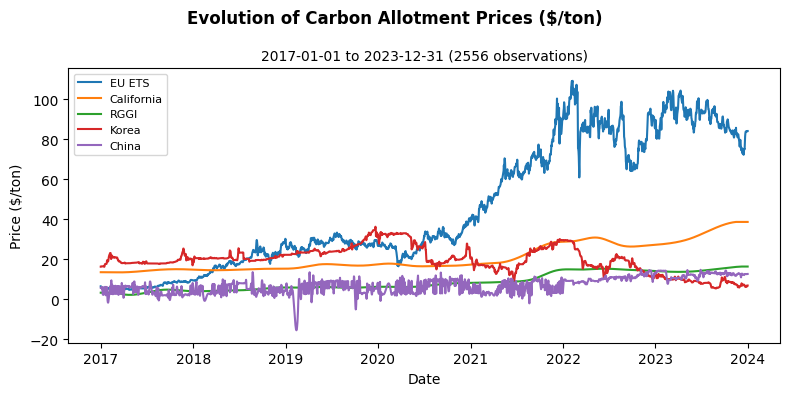

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['EU ETS'], label = 'EU ETS')
plt.plot(df.index, df['California'], label = 'California')
plt.plot(df.index, df['RGGI'], label = 'RGGI')
plt.plot(df.index, df['Korea'], label = 'Korea')
plt.plot(df.index, df['China'], label = 'China')
plt.xlabel('Date')
plt.ylabel('Price ($/ton)')
plt.suptitle('Evolution of Carbon Allotment Prices ($/ton)', weight='bold')
plt.title('2017-01-01 to 2023-12-31 (2556 observations)', fontsize=10)
plt.tight_layout()
plt.legend(loc='upper left', fontsize=8)
plt.show()

## 1.2 - Show that these price movements (and returns generated thereof) are uncorrelated with major financial asset classes (S&P 500 index, commodities indices, emerging markets indices, etc..) using correlation matrices

In [ ]:
! pip install yfinance
import yfinance as yf
import pandas_datareader.data as pdr

In [ ]:
yahoo_tick = ['EEM', 'EMB', '^GSPC', 'DBC', 'GLD', 'EUR=X']
ydata = yf.download(yahoo_tick, start='2017-01-01', end='2023-12-31', interval='1d')['Adj Close']
df1 = pd.concat([df, ydata], axis=1)
for col in yahoo_tick:
    df1[col].fillna(method='ffill', inplace=True)
    df1[col].fillna(method='bfill', inplace=True)
df1['Carbon Index'] = (df['EU ETS'] + df['California'] + df['RGGI'] + df['Korea'] + df['China'])/5
df1 = df1[['Carbon Index', 'DBC', 'EEM', 'EMB', 'GLD', '^GSPC']]
df1 = df1.pct_change()[1:]

[*********************100%%**********************]  6 of 6 completed


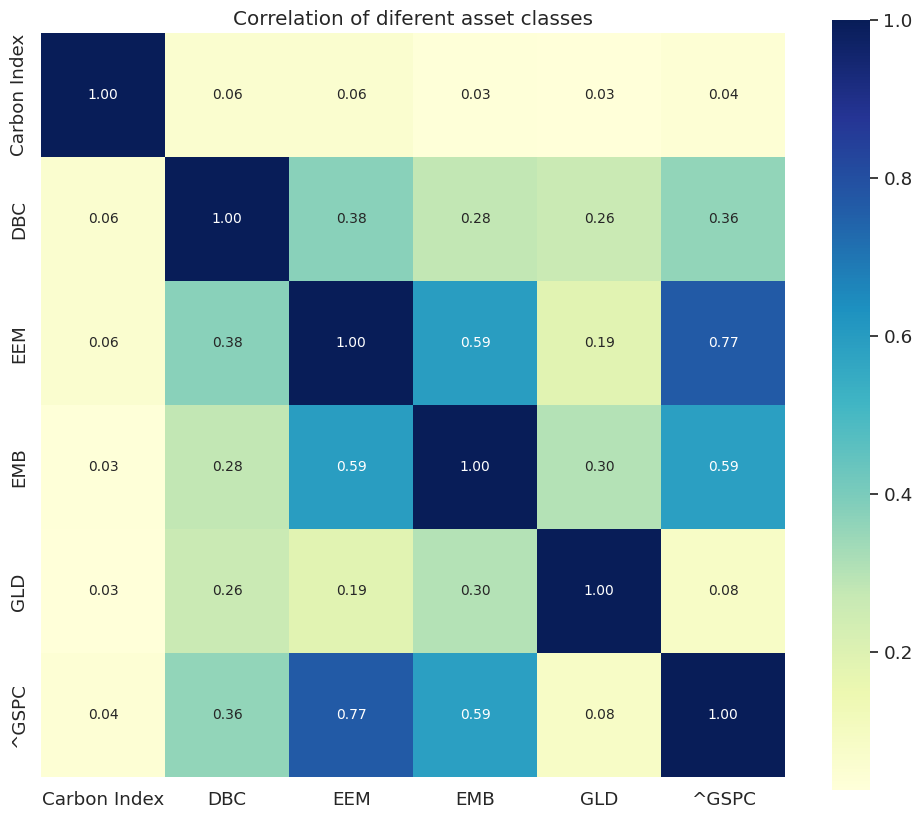

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df1.corr()
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"size": 10}, square=True, fmt=".2f")

# Graph display
plt.title("Correlation of diferent asset classes")
plt.show()

In [ ]:
df2 = pd.DataFrame()
df2['Carbon Index'] = (df['EU ETS'] + df['California'] + df['RGGI'] + df['Korea'] + df['China'])/5
df2['Carbon Index_SMA30'] = df2['Carbon Index'].rolling(30).mean()
df2['Carbon Index_EWMA30'] = df2['Carbon Index'].ewm(span=30).mean()
#df2 = df1[['Carbon Index', 'Carbon Index_SMA10', 'Carbon Index_EWMA15']]
df2.dropna(inplace=True)

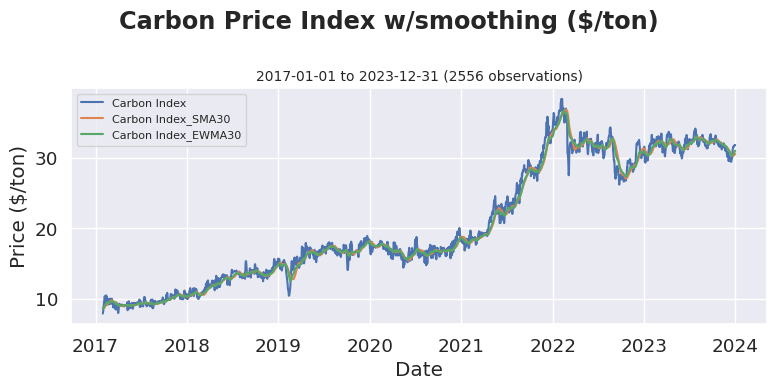

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(df2.index, df2['Carbon Index'], label = 'Carbon Index')
plt.plot(df2.index, df2['Carbon Index_SMA30'], label = 'Carbon Index_SMA30')
plt.plot(df2.index, df2['Carbon Index_EWMA30'], label = 'Carbon Index_EWMA30')
plt.xlabel('Date')
plt.ylabel('Price ($/ton)')
plt.suptitle('Carbon Price Index w/smoothing ($/ton)', weight='bold')
plt.title('2017-01-01 to 2023-12-31 (2556 observations)', fontsize=10)
plt.tight_layout()
plt.legend(loc='upper left', fontsize=8)
plt.show()

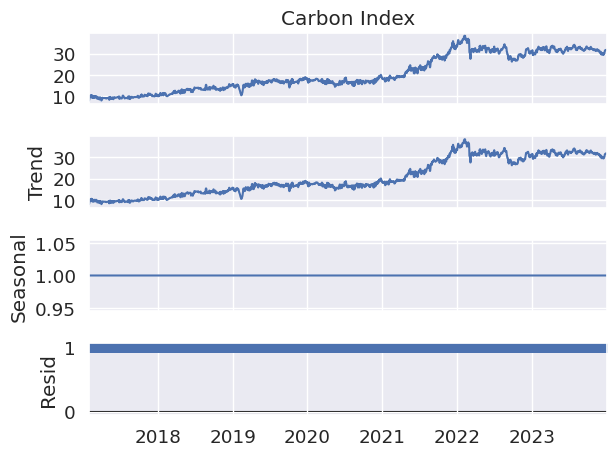

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

decompose_result = seasonal_decompose(df2['Carbon Index'],model='multiplicative',period=1)
decompose_result.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Holt Winters grapg: Additive Trend and Multiplicative Trend'}, xlabel='Date'>

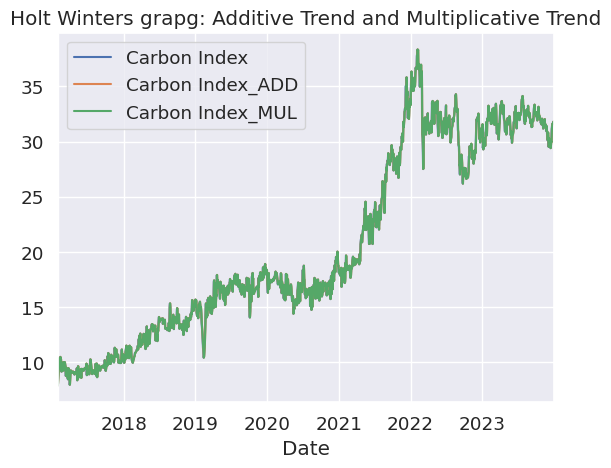

In [ ]:
df2['Carbon Index_ADD'] = ExponentialSmoothing(df2['Carbon Index'],trend='add').fit().fittedvalues
df2['Carbon Index_MUL'] = ExponentialSmoothing(df2['Carbon Index'],trend='mul').fit().fittedvalues
df2[['Carbon Index','Carbon Index_ADD','Carbon Index_MUL']].plot(title='Holt Winters grapg: Additive Trend and Multiplicative Trend')

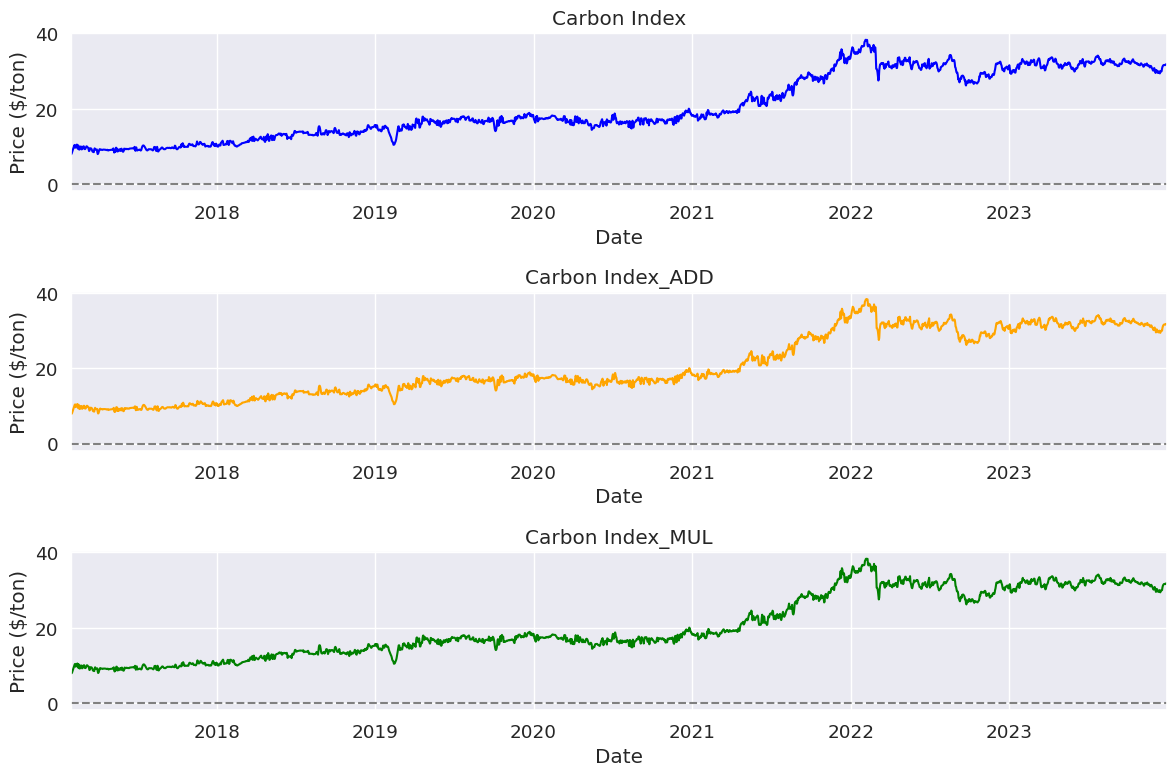

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
df2["Carbon Index"].plot(title="Carbon Index", color='blue')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Price ($/ton)")

plt.subplot(3, 1, 2)
df2["Carbon Index_ADD"].plot(title="Carbon Index_ADD", color='orange')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Price ($/ton)")

plt.subplot(3, 1, 3)
df2["Carbon Index_MUL"].plot(title="Carbon Index_MUL", color='green')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Price ($/ton)")
plt.tight_layout()
plt.show()